# TME 9: Merge
> Consignes: le fichier TME8_Sujet.ipynb est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2018/course/view.php?id=4650. Si vous êtes en binôme, renommez-le en TME8_nom1_nom2.ipynb.

N'oubliez pas de sauvegarder fréquemment votre notebook !!

## Données et codes utiles au TME

In [112]:
from PIL import Image
from pylab import *

### Données
img_test = full((64,64),150,dtype=uint8)
img_test[32:48,16:16+32] = 100
img_test[8:24,40:56] = 50
angio = array(Image.open('images/angiogra.png'))
cam = array(Image.open('images/cameraman.png'))
muscle = array(Image.open('images/muscle.png'))
prisme = array(Image.open('images/prisme.png'))
seiche = array(Image.open('images/seiche.png'))

### Fonction d'affichage
def affichage_14(affichages,titres=None):
    """ list[Array]*list[str] -> NoneType
    Dffectue entre 1 et 4 affichages avec leurs titres, pour des images ou courbes
    
    Paramètres :
      - liste des affichages (entre 1 et 4)
      - liste des titres (entre 1 et 4, autant que de affichages), optionnelle    
    """
    
    if not type(affichages) == type([]):
        affichages = [affichages]
        
    if titres is None:
        titres = ['',]*len(affichages)
        
    if not type(titres) == type([]):
        titres = [titres]
    
    nb_affichages = len(affichages)
    if nb_affichages >4 or nb_affichages < 1 :
        raise ValueError('affichage_14 nécéssite 1 à 4 entrées en paramètre')        
        
    if nb_affichages != len(titres):
        raise ValueError('affichage_14 nécéssite autant de titres que d\'affichages')
        
    courbes = False
    for i in range(0,nb_affichages):
        s = subplot(101+10*nb_affichages+i)
        s.set_title(titres[i])
        if len(affichages[i].shape)==2 and affichages[i].shape[0] > 1 and affichages[i].shape[1] > 1:
            # on affiche une image
            s.imshow(affichages[i], cmap="gray",interpolation='nearest', aspect='equal')
        else :
            # il s'agit d'une seule ligne, à afficher comme une courbe
            plot(affichages[i])
            courbes=True

    agrandissement_h = nb_affichages
    agrandissement_v = nb_affichages*2 if courbes else nb_affichages
    params = gcf()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0]*agrandissement_v, plSize[1]*agrandissement_h) )
    show()



Recopier ci-dessous le code des fonctions ``split()``, ``predsplit1()`` et ``splitprof()``
écrites au TME 8:

In [229]:
def split(I,reg,pred,*args):
    """ Array*Bloc*(Array*Bloc*...->bool)*... -> 4-aire
        Découpage de I en arbre 4-aire sur un critère d'écart-type minimal
    """
    x, y, n, m = reg
    if pred(I, reg, *args) and (n>2) and (m >2) :
        No= split (I, (x, y, n//2, m//2), pred, *args)
        Ne= split (I, (x, y+(m//2), n//2, m//2), pred, *args)
        So= split (I, (x+(n//2), y, n//2, m//2), pred, *args)
        Se= split (I, (x+(n//2), y+(m//2), n//2, m//2), pred, *args)
        
        return [No, Ne, So, Se]
    return [reg]
    

def predsplit1(I,reg,*args):
    """ Array*Bloc*... -> bool
    """ 
    x, y, n, m= reg
    
    return np.std(I[x:x+n, y:y+m])> args[0]

def splitprof(L, l):
    """ 4-aire -> list[Bloc]"""
    if type(L) is tuple :
        l.append(L)
        return L, l
    else :
        for y in L :
            splitprof(y,l)

def splitprof_list(L):
    l =[]
    splitprof(L,l)
    return l




## Exercice 1
### Question 1
Modifier la fonction ``splitprof(L)`` pour en faire une fonction ``splitprofstat(L,I)`` qui rend une liste de feuilles de l'arbre 4-aire ``L`` et telle que chaque élément de cette liste, de type ``Bloc``, est enrichi de trois scalaires, le premier étant la taille, le second la moyenne et la troisième la variance des valeurs de pixels du bloc dans l'image ``I``. Cette fonction rend alors une liste dont les éléments ont pour type formel:
```python
type Blocstat = tuple[int**4,int,float**2]
```
Les quatre premières valeurs sont celles du type ``Bloc``, la cinquième est la taille du bloc (en nombre de pixels) et les deux dernières correspondent à la moyenne et la variance calculées sur la région.


In [230]:
# type Blocstat = tuple[int**4,int,float**2]

def splitprofstat(L, I, l):
    """ 4-aire -> list[Bloc]"""
    if type(L) is tuple :
        x, y, n, m = L
        mo=I[x:x+n, y:y+m].mean()
        s=I[x:x+n, y:y+m].std()
        tab = (x,y,n,m,n*m,mo, s)
        l.append(tab)
        return L, l
    else :
        for y in L :
            splitprofstat(y,I,l)
    
def splitprofstat_list(L,I):
    l =[]
    splitprofstat(L,I, l)
    return l
    
w, h = img_test.shape
image1=split(img_test, (0, 0, w, h), predsplit1, 1)

print("image 1", image1)

image2 =splitprofstat_list(image1, img_test)

print("image 2", image2)


image 1 [[(0, 0, 32, 32)], [[[(0, 32, 8, 8)], [(0, 40, 8, 8)], [(8, 32, 8, 8)], [(8, 40, 8, 8)]], [[(0, 48, 8, 8)], [(0, 56, 8, 8)], [(8, 48, 8, 8)], [(8, 56, 8, 8)]], [[(16, 32, 8, 8)], [(16, 40, 8, 8)], [(24, 32, 8, 8)], [(24, 40, 8, 8)]], [[(16, 48, 8, 8)], [(16, 56, 8, 8)], [(24, 48, 8, 8)], [(24, 56, 8, 8)]]], [[(32, 0, 16, 16)], [(32, 16, 16, 16)], [(48, 0, 16, 16)], [(48, 16, 16, 16)]], [[(32, 32, 16, 16)], [(32, 48, 16, 16)], [(48, 32, 16, 16)], [(48, 48, 16, 16)]]]
image 2 [(0, 0, 32, 32, 1024, 150.0, 0.0), (0, 32, 8, 8, 64, 150.0, 0.0), (0, 40, 8, 8, 64, 150.0, 0.0), (8, 32, 8, 8, 64, 150.0, 0.0), (8, 40, 8, 8, 64, 50.0, 0.0), (0, 48, 8, 8, 64, 150.0, 0.0), (0, 56, 8, 8, 64, 150.0, 0.0), (8, 48, 8, 8, 64, 50.0, 0.0), (8, 56, 8, 8, 64, 150.0, 0.0), (16, 32, 8, 8, 64, 150.0, 0.0), (16, 40, 8, 8, 64, 50.0, 0.0), (24, 32, 8, 8, 64, 150.0, 0.0), (24, 40, 8, 8, 64, 150.0, 0.0), (16, 48, 8, 8, 64, 50.0, 0.0), (16, 56, 8, 8, 64, 150.0, 0.0), (24, 48, 8, 8, 64, 150.0, 0.0), (24, 56, 8

### Question 2
Dans la suite du TME, on considère le type formel:
```python
type Region = list[Blocstat]
```
Une région, comme vu au TME, est donc une liste de blocs. Écrire le prédicat de fusion ``predmerge(b,R,*args)`` vu en TD. Cette fonction retourne ```True``` si le bloc ``b`` doit fusionner dans la région ``R``. Si telle est le cas, alors le premier élément de la liste ``R`` voit ses statistiques modifiées: elles décrivent celles de l'ensemble des blocs de la région ainsi fusionnée.

In [231]:
def predmerge(b,R,*args):
    """ Blocstat*Region*... -> bool 
        Si fusion, R[0] est modifié
    """
    x1, y1, w1, h1, n1, v1, t1 =b
    x2, y2, w2, h2, n2, v2, t2 = R[0]
    n=n1+n2
    v= ((n1*v1)+(n2*v2))/n
    t=(n1*t1*t1 + n2*t2*t2 + n1*v1*v1 + n2*v2*v2)/n - v*v
    if(t<args[0]):
        return True
    return False


### Question 3
Implémenter les fonctions ```estdans()```, ```sontvoisins()```, ```voisins()``` et finalement ```merge()``` vues en TD.

In [232]:
def estdans(x,y,a):
    """ int*int*Blocstat -> bool 
        Teste si (x,y) est dans a 
    """
    xa, ya, wa, ha=a[:4]
    return (x>= xa) and (y>= ya) and (x<(xa+wa)) and (y<(ya+ha))

def sontvoisins(a,b):
    """ Blocstat**2 -> bool
        Teste si a et b sont voisins
    """
    if b[2] < a[2] or b[3] < a[3]:
        a,b = b,a
    xcentre = a[0]+a[2]//2
    ycentre = a[1]+a[3]//2
    return estdans(xcentre+a[2], ycentre, b) or estdans(xcentre-a[2], ycentre, b) or estdans(xcentre, ycentre+a[3], b) or estdans(xcentre, ycentre-a[3], b)

def voisins(b,K):
    """ Blocstat*list[Blocstat]->list[Blocstat]
        retourne la liste des elements de K voisins de b
    """
    N=[]
    for n in K :
        if(sontvoisins (b, n)):
            N.append(n)
    return N

# type Region = list[Blocstat]

def merge(S,I,pred,*args):
    """ 4-aire*Array*(Blocstat*Region*...->bool) -> list[Region]
        Fusionne les feuilles de S en une liste de régions
    """
    
    K = []
    for (x,y,n,m,t, u,s) in S :
        K.append((x,y,n,m,n*m,I[x:x+n, y:y+m].mean(),I[x:x+n, y:y+m].std()))
    L = []
    while (len(K)>0):
        b = K[0]
        K = K[1:]
        R = [b]
        N = voisins(b,K)
        while len(N)>0:
            bi = N.pop(0)
            if pred(bi, R, *args):
                R.append(bi)
                K.remove(bi)
                vois = voisins(bi, K)
                for bj in vois:
                    if bj not in N:
                        N += [bj]
        L.append(R)
    return L


### Question 4
Faire la mise au point des fonctions précédentes à l'aide de l'image ``img_test``.

In [234]:
split1 = splitprof_list(image1)
print(split1)
split2=splitprofstat_list(split1,img_test)
res = merge(split2,img_test,predmerge,1)
print(len(res))
res

[(0, 0, 32, 32), (0, 32, 8, 8), (0, 40, 8, 8), (8, 32, 8, 8), (8, 40, 8, 8), (0, 48, 8, 8), (0, 56, 8, 8), (8, 48, 8, 8), (8, 56, 8, 8), (16, 32, 8, 8), (16, 40, 8, 8), (24, 32, 8, 8), (24, 40, 8, 8), (16, 48, 8, 8), (16, 56, 8, 8), (24, 48, 8, 8), (24, 56, 8, 8), (32, 0, 16, 16), (32, 16, 16, 16), (48, 0, 16, 16), (48, 16, 16, 16), (32, 32, 16, 16), (32, 48, 16, 16), (48, 32, 16, 16), (48, 48, 16, 16)]
3


[[(0, 0, 32, 32, 1024, 150.0, 0.0),
  (0, 32, 8, 8, 64, 150.0, 0.0),
  (8, 32, 8, 8, 64, 150.0, 0.0),
  (16, 32, 8, 8, 64, 150.0, 0.0),
  (24, 32, 8, 8, 64, 150.0, 0.0),
  (32, 0, 16, 16, 256, 150.0, 0.0),
  (0, 40, 8, 8, 64, 150.0, 0.0),
  (24, 40, 8, 8, 64, 150.0, 0.0),
  (48, 0, 16, 16, 256, 150.0, 0.0),
  (0, 48, 8, 8, 64, 150.0, 0.0),
  (24, 48, 8, 8, 64, 150.0, 0.0),
  (48, 16, 16, 16, 256, 150.0, 0.0),
  (0, 56, 8, 8, 64, 150.0, 0.0),
  (24, 56, 8, 8, 64, 150.0, 0.0),
  (32, 48, 16, 16, 256, 150.0, 0.0),
  (48, 32, 16, 16, 256, 150.0, 0.0),
  (8, 56, 8, 8, 64, 150.0, 0.0),
  (16, 56, 8, 8, 64, 150.0, 0.0),
  (48, 48, 16, 16, 256, 150.0, 0.0)],
 [(8, 40, 8, 8, 64, 50.0, 0.0),
  (8, 48, 8, 8, 64, 50.0, 0.0),
  (16, 40, 8, 8, 64, 50.0, 0.0),
  (16, 48, 8, 8, 64, 50.0, 0.0)],
 [(32, 16, 16, 16, 256, 100.0, 0.0), (32, 32, 16, 16, 256, 100.0, 0.0)]]

### Question 5
Écrire une fonction ``regions(LR,shape)`` qui prend une liste de régions telle que rendu par la fonction ``merge()`` et rend une image des régions. Chaque région sera colorée avec le niveau de gris correspondant à la moyenne de la région. Le paramètre ``shape`` donne la taille de l'image à produire. Tester la fonction sur l'exemple précédent.

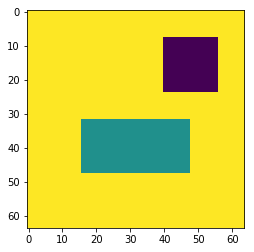

In [235]:
def regions(LR,shape):
    """ list[Region] -> Array """
    buf = zeros(shape,dtype=uint8)
    for R in LR:
        x,y,n,m,s,mu,v=R[0]
        for b in R:
            x,y,n,m,s,t,v=b
            buf[x:x+n,y:y+m] = int(mu)
    return buf

imshow(regions(res,img_test.shape))


## Exercice 2: expérimentation
### Question 1:
Tester la fonction ``merge()`` sur les images ``angio``, ``cam``, ``muscle``, ``prisme`` et ``seiche``.

In [244]:

def affiche (I, seuil):
    w,h = I.shape
    spliti = split(I, (0, 0, w, h), predsplit1, seuil)
    split1 = splitprof_list(spliti)
    split2 = splitprofstat_list(split1, I)
    res = merge(split2,I,predmerge, [seuil])
    return regions(res,I.shape)


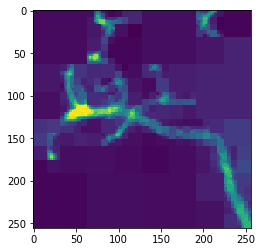

In [245]:
img_angio = affiche(angio, 20)

imshow(img_angio)

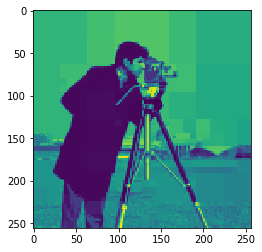

In [247]:
img_cam = affiche(cam, 15)

imshow(img_cam)

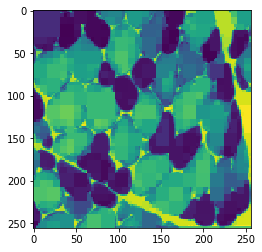

In [248]:
img_muscle = affiche(muscle, 20)

imshow(img_muscle)

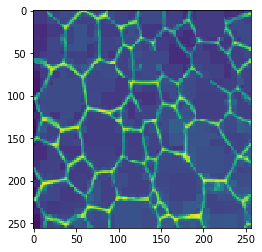

In [249]:
img_prisme = affiche(prisme, 15)

imshow(img_prisme)

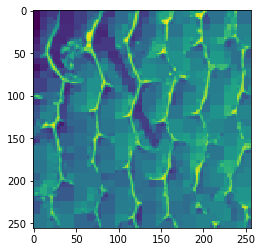

In [251]:
img_seiche = affiche(seiche, 10)

imshow(img_seiche)

### Question 2 (bonus):
Utiliser un critère de découpage alternatif, par exemple celui proposé en cours: on fusionne qui la variance de la région fusionné est plus petite que celle de la région non fusionnée. Tester sur les images.

### Question 3 (bonus):
La fusion dépend de la façon dont on visite les régions. On peut alors faire un tri des feuilles de l'arbre 4-aire, par exemple, des blocs les plus gros aux plus petits, ou le contraire (utiliser la fonction Python ``sorted()``). La même question peut se poser lorsqu'on calcule l'ensemble des voisins de la région que l'on fusionne. Faut-il les trier ? Si oui, selon quel critère ? leur taille ? leur proximité ? Evidemment il n'y a pas de réponse universelle mais adaptée à chaque type de problème. Faites quelques tests pour voir l'influence de ces tris sur le résultat de la fusion.